In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import oceanspy as ospy

In [3]:
run datasets.py

In [4]:
sin_od.dataset

<xarray.Dataset>
Dimensions:  (X: 9, Xp1: 10, Y: 10, Yp1: 11, Z: 11, Zl: 11, Zp1: 12, Zu: 11)
Coordinates:
  * X        (X) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8
  * Xp1      (Xp1) float64 -0.05 0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85
  * Y        (Y) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9
  * Yp1      (Yp1) float64 -0.05 0.05 0.15 0.25 0.35 ... 0.65 0.75 0.85 0.95
  * Z        (Z) float64 -0.05 -0.15 -0.25 -0.35 ... -0.75 -0.85 -0.95 -1.05
  * Zp1      (Zp1) float64 0.0 -0.1 -0.2 -0.3 -0.4 ... -0.7 -0.8 -0.9 -1.0 -1.1
  * Zu       (Zu) float64 -0.1 -0.2 -0.3 -0.4 -0.5 -0.6 -0.7 -0.8 -0.9 -1.0 -1.1
  * Zl       (Zl) float64 0.0 -0.1 -0.2 -0.3 -0.4 -0.5 -0.6 -0.7 -0.8 -0.9 -1.0
Data variables:
    YC       (Y, X) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.9 0.9 0.9 0.9 0.9 0.9
    XC       (Y, X) float64 0.0 0.1 0.2 0.3 0.4 0.5 ... 0.3 0.4 0.5 0.6 0.7 0.8
    YG       (Yp1, Xp1) float64 -0.05 -0.05 -0.05 -0.05 ... 0.95 0.95 0.95 0.95
    XG       (Yp1, Xp1) float64 -0.05 

In [6]:
curl_ds = ospy.compute.curl(sin_od, iName='sinUY', jName='sinVX')     

In [17]:
for var in curl_ds.data_vars:
    var = curl_ds[var]

In [19]:
var - (np.cos(var['Xp1'])-np.cos(var['Yp1']))

<xarray.DataArray (Z: 11, Yp1: 11, Xp1: 10)>
array([[[          nan,           nan, ...,           nan,           nan],
        [          nan,  0.000000e+00, ...,  1.112617e-04,           nan],
        ...,
        [          nan, -1.411353e-04, ..., -2.987365e-05,           nan],
        [          nan,           nan, ...,           nan,           nan]],

       [[          nan,           nan, ...,           nan,           nan],
        [          nan,  0.000000e+00, ...,  1.112617e-04,           nan],
        ...,
        [          nan, -1.411353e-04, ..., -2.987365e-05,           nan],
        [          nan,           nan, ...,           nan,           nan]],

       ...,

       [[          nan,           nan, ...,           nan,           nan],
        [          nan,  0.000000e+00, ...,  1.112617e-04,           nan],
        ...,
        [          nan, -1.411353e-04, ..., -2.987365e-05,           nan],
        [          nan,           nan, ...,           nan,           nan]]

In [45]:
from numpy.testing import assert_allclose

velocities = [[None   , 'sinVZ', 'sinWY'],
              ['sinUZ',    None, 'sinWX'],
              ['sinUY', 'sinVX',    None]]
for _, vels in enumerate(velocities):
    print(vels)
    curl_ds = ospy.compute.curl(sin_od, iName=vels[0], jName=vels[1], kName=vels[2]) 
    for var in curl_ds.data_vars: var = curl_ds[var]

    coords  = {coord[0]: var[coord] for coord in var.coords}
    coords['Z'], coords['Y'], coords['X'] = xr.broadcast(coords['Z'], coords['Y'], coords['X'])

    terms = var.name.split('-')
    for i, term in enumerate(terms):
        axis = term[-1]
        terms[i] = np.cos(coords[axis])
    check = terms[0] - terms[1]
    mask = xr.where(np.logical_or(check.isnull(), var.isnull()), 0, 1)
    
    # Assert using numpy
    assert_allclose(var.where(mask).values, check.where(mask).values, 1.E-2)

[None, 'sinVZ', 'sinWY']
['sinUZ', None, 'sinWX']
['sinUY', 'sinVX', None]


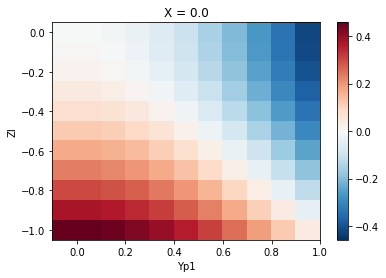

In [41]:
check.isel(X=0).plot()

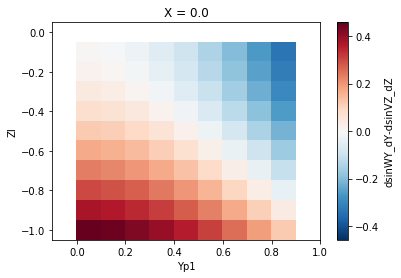

In [42]:
var.isel(X=0).plot()

In [ ]:
sin_od.dataset['sinY'].isel(X=0, Z=0).plot()

In [ ]:
varNameList = ['sinZ', 'sinX', 'sinY']
grad_ds = ospy.compute.gradient(sin_od, varNameList=varNameList)

In [ ]:
grad_ds['dsinX_dX'].isel(Z=0, Y=0).plot()
grad_ds['dsinY_dY'].isel(Z=0, X=0).plot()
grad_ds['dsinZ_dZ'].isel(Y=0, X=0).plot()

In [ ]:
grad_ds['dsinX_dX'].isel(Z=0, Y=0).plot()
np.cos(sin_od.dataset['X']).plot(marker='x')

print(grad_ds['dsinX_dX'].isel(Z=0, Y=0).values)
np.cos(sin_od.dataset['Xp1']).plot(marker='x')

In [ ]:
sin_od.dataset['Xp1']

In [ ]:
grad_ds['dsinX_dX']

In [ ]:
grad_ds['dsinY_dY'].isel(Z=0, X=0).plot()
np.cos(sin_od.dataset['Y']-.05).plot(marker='x')

In [ ]:
grad_ds['dsinZ_dZ'].isel(Y=0, X=0).plot()
np.cos(sin_od.dataset['Z']).plot(marker='x')

In [ ]:
sin_od.dataset

In [ ]:
import numpy as np

In [ ]:
np.testing.assert_array_almost_equal_nulp(od.dataset['XC'], od.dataset['XC'])

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
from oceanspy import OceanDataset

class Datasets:
    def __init__(self):
        # Create a small datasets
        self.NX = 9
        self.NY = 10
        self.NZ = 11
        self.NT = 12
        
    def sinusoidal(self):
        
        step = 0.1
        
        # Horizontal Dimensions
        X      = xr.DataArray( np.arange(self.NX),     dims = 'X')  * step
        Xp1    = xr.DataArray( np.arange(self.NX+1),   dims = 'Xp1')* step
        Y      = xr.DataArray( np.arange(self.NY),     dims = 'Y')  * step
        Yp1    = xr.DataArray( np.arange(self.NY+1),   dims = 'Yp1')* step
        
        # Vertical Dimensions
        Z      = xr.DataArray(-np.arange(self.NZ)-0.5, dims = 'Z')  * step
        Zp1    = xr.DataArray(-np.arange(self.NZ+1),   dims = 'Zp1')* step
        Zu     = xr.DataArray(-np.arange(self.NZ)-1,   dims = 'Zu') * step
        Zl     = xr.DataArray(-np.arange(self.NZ),     dims = 'Zl') * step
        
        # Space Coordinates
        YC, XC = xr.broadcast(Y+0.5*step, X+0.5*step)
        YG, XG = xr.broadcast(Yp1       , Xp1)
        YU, XU = xr.broadcast(Y+0.5*step, Xp1)
        YV, XV = xr.broadcast(Yp1       , X+0.5*step)
        
        # Spacing
        drC = xr.full_like(Zp1, step)
        drF = xr.full_like(Z  , step)
        dxC = xr.full_like(XU,  step)
        dyC = xr.full_like(XV,  step)
        dxF = xr.full_like(XC,  step)
        dyF = xr.full_like(XC,  step)
        dxG = xr.full_like(XV,  step)
        dyG = xr.full_like(XU,  step)
        dxV = xr.full_like(XG,  step)
        dyU = xr.full_like(XG,  step)
        
        # HFac
        HFacC, _ = xr.broadcast(xr.full_like(Z, 1), xr.full_like(XC, 1))
        HFacW, _ = xr.broadcast(xr.full_like(Z, 1), xr.full_like(XU, 1))
        HFacS, _ = xr.broadcast(xr.full_like(Z, 1), xr.full_like(XV, 1))

        return xr.Dataset({'X'    : X,     'Xp1': Xp1, 
                           'Y'    : Y,     'Yp1': Yp1,
                           'Z'    : Z,     'Zp1': Zp1, 'Zu': Zu, 'Zl': Zl,
                           'YC'   : YC,    'XC' : XC, 
                           'YG'   : YG,    'XG' : XG, 
                           'YU'   : YU,    'XU' : XU, 
                           'YV'   : YV,    'XV' : XV,
                           'drC'  : drC,   'drF': drF,
                           'dxC'  : dxC,   'dyC': dyC,
                           'dxF'  : dxF,   'dyF': dyF,
                           'dxG'  : dxG,   'dyG': dyG,
                           'dxV'  : dxV,   'dyU': dyU,
                           'HFacC': HFacC, 'HFacW': HFacW, 'HFacS': HFacS})

In [ ]:
ds = Datasets().sinusoidal()

In [ ]:
testod = ospy.OceanDataset(ds).set_grid_coords({'Y'    : {'Y': None, 'Yp1': 0.5},
                                                'X'    : {'X': None, 'Xp1': 0.5},
                                                'Z'    : {'Z': None, 'Zp1': 0.5, 'Zu': 0.5, 'Zl': -0.5}})

In [ ]:
grad = ospy.compute.gradient(testod, varNameList='Z_test')

In [ ]:
grad['dZ_test_dY'].max()

In [ ]:
Zf  = ds.Z.values
f   = ds.Z_test.isel(Y=0, X=0).values
Zfp = ds.Zl
fp  = grad.dZ_test_dZ.isel(Y=0, X=0).values

In [ ]:
grad['dZ_test_dY'].min()

In [ ]:
grad['dZ_test_dY'].coords

In [ ]:
xr.broadcast(xr.Dataset({coord: grad[coord] for coord in grad['dZ_test_dY'].coords}))

In [ ]:
plt.plot(Zf, f)
plt.plot(Zfp, fp)
plt.plot(Zfp, np.cos(Zfp))

In [ ]:
np.float32(fp) - np.float32(np.cos(Zfp))

In [ ]:
ds['Z_test'].isel(X=0, Y=0).plot({'Y'    : {'Y': None, 'Yp1': 0.5},
                                  'X'    : {'X': None, 'Xp1': 0.5},
                                  'Z'    : {'Z': None, 'Zp1': 0.5, 'Zu': 0.5, 'Zl': -0.5})

In [ ]:
class Datasets:
    def __init__(self):
        # Create a small datasets
        self.NX = 9
        self.NY = 10
        self.NZ = 11
        self.NT = 12
        
    def sinusoidal(self):
        
        scale = 5
        step  = 0.1
        
        # Horizontal Dimensions
        X      = xr.DataArray( np.arange(self.NX*scale),     dims = 'X')  * step
        Xp1    = xr.DataArray( np.arange(self.NX*scale+1),   dims = 'Xp1')* step
        Y      = xr.DataArray( np.arange(self.NY*scale),     dims = 'Y')  * step
        Yp1    = xr.DataArray( np.arange(self.NY*scale+1),   dims = 'Yp1')* step
        
        # Vertical Dimensions
        Z      = xr.DataArray(-np.arange(self.NZ*scale)-0.5, dims = 'Z')  * step
        Zp1    = xr.DataArray(-np.arange(self.NZ*scale+1),   dims = 'Zp1')* step
        Zu     = xr.DataArray(-np.arange(self.NZ*scale)-1,   dims = 'Zu') * step
        Zl     = xr.DataArray(-np.arange(self.NZ*scale),     dims = 'Zl') * step
        
        # Space Coordinates
        YC, XC = xr.broadcast(Y+0.5*step, X+0.5*step)
        YG, XG = xr.broadcast(Yp1       , Xp1)
        YU, XU = xr.broadcast(Y+0.5*step, Xp1)
        YV, XV = xr.broadcast(Yp1       , X+0.5*step)
        
        # Spacing
        drC = xr.full_like(Zp1, step)
        drF = xr.full_like(Z  , step)
        dxC = xr.full_like(XU,  step)
        dyC = xr.full_like(XV,  step)
        dxF = xr.full_like(XC,  step)
        dyF = xr.full_like(XC,  step)
        dxG = xr.full_like(XV,  step)
        dyG = xr.full_like(XU,  step)
        dxV = xr.full_like(XG,  step)
        dyU = xr.full_like(XG,  step)
        
        # HFac
        HFacC, _ = xr.broadcast(xr.full_like(Z, 1), xr.full_like(XC, 1))
        HFacW, _ = xr.broadcast(xr.full_like(Z, 1), xr.full_like(XU, 1))
        HFacS, _ = xr.broadcast(xr.full_like(Z, 1), xr.full_like(XV, 1))
        
        # Sin test
        Z_test, Y_test, X_test = xr.broadcast(np.sin(Z), np.sin(Y), np.sin(X))

        return xr.Dataset({'X'     : X,      'Xp1'   : Xp1, 
                           'Y'     : Y,      'Yp1'   : Yp1,
                           'Z'     : Z,      'Zp1'   : Zp1, 'Zu': Zu, 'Zl': Zl,
                           'YC'    : YC,     'XC'    : XC, 
                           'YG'    : YG,     'XG'    : XG, 
                           'YU'    : YU,     'XU'    : XU, 
                           'YV'    : YV,     'XV'    : XV,
                           'drC'   : drC,    'drF'   : drF,
                           'dxC'   : dxC,    'dyC'   : dyC,
                           'dxF'   : dxF,    'dyF'   : dyF,
                           'dxG'   : dxG,    'dyG'   : dyG,
                           'dxV'   : dxV,    'dyU'   : dyU,
                           'HFacC' : HFacC,  'HFacW' : HFacW, 'HFacS': HFacS,
                           'Z_test': Z_test, 'Y_test': Y_test, 'X_test': X_test})

In [ ]:
b

In [ ]:
for var in ds.variables:
    print(set(ds[var].dims).issubset(od.dataset[var].dims))

In [ ]:
X = np.arange(0, 50)*0.1
f = np.sin(X)
fp = np.cos(X)
X1 = (X[1:]+X[:-1])/2
dfdx = (f[1:]-f[:-1])/(X[1:]-X[:-1])
ddfdxdx = (dfdx[1:]-dfdx[:-1])/(X1[1:]-X1[:-1])
X2 = (X1[1:]+X1[:-1])/2

In [ ]:
plt.plot(X, -f)
plt.plot(X, fp)
plt.plot(X1, dfdx, 'o')
plt.plot(X2, ddfdxdx, 'o')

In [ ]:
-f[1:-1] - ddfdxdx

In [ ]:
ddfdxdx

In [ ]:
plt.plot(grad)